# Lab 6: Random processes and variations on a random walk

At this point, you should recognize the need for this code. We are bringing in the modules necessary for this lab.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as st
print ("Modules Imported!")

Modules Imported!


## Random Processes:

Before we go over random walks, it's first a good idea to talk about a random process.  Simply put, __a random process is a collection of indexed random variables on the same probability space__. We say $X = (X_t: t\in \cal T)$ is a *random process* where each $X_t$ is a random variable. The index $t$ often corresponds to time.  We already saw one type of random process, namely, a Bernoulli random process with parameter $p$, such that $T$ is the positive integers and $X_t$ is a Bernoulli random variable with parameter $p$ for each $t\geq 1.$  __A random walk is a path through time based on discrete random steps.__ After any given number of steps, the next step is determined by a random variable. Let's visualize this with a scenario. A man goes on a walk with a bag full of marbles. Inside the bag are 4 blue marbles, 3 red marbles, and 2 yellow marble. At every point in time the man pulls a marble out of the bag to determine his next step. If he pulls a blue marble he takes one step back, a red, one step forward, and a yellow two steps forward. After taking the step he places the marble back in the bag.  Below is a graph of this behavior for 40 time units. Each step he takes is a random variable based on his pick of marbles.

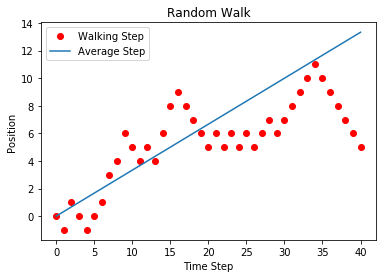

In [2]:
p = [i*1./(4+3+2) for i in [4,3,2]]
c = [-1,1,2]
T = 40   # Here T denotes the number of time steps
Xmarb = st.rv_discrete(name='Xmarb',values=(c,p))

x = [0]
for t in range(T):
    x.append(x[t]+Xmarb.rvs())
    
plt.plot(x, 'ro', label = 'Walking Step')
t = np.linspace(0,T,10000)
s = Xmarb.mean()  # s is the mean of one step
plt.plot(t,np.multiply(s,t), label='Average Step')
plt.title('Random Walk')
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.legend(loc="best")

In the above graph we plot the actual path the man takes versus what we would expect his path to be. At each step he independently pulls out a marble. We can calculate his expected step size by simply finding the expected value of the random variable for one step. If you increase the number of time steps $T$, you'll notice that his random walk more closely resembles our expectations. This follows directly from the *law of large numbers.*

In this next example, we do the same thing, but now the probability distributions of his steps vary with time. That is, for for each step we create a new distribution. For every unit in time, the man can either take two steps forward with probability $\cos^2 (2\pi n/T)$ or take one step backward with probability  $\sin^2(2\pi n/T)$. So his probability of moving forward changes in time. Try running the code multiple times. Try larger T such as T=400.

Here is a note about the time scaling for this random walk.  By the angle addition formula for cosine, $\cos^2 (2\pi t/T) = \frac{1+\cos (4\pi t/T)}{2},$ which has period $T/2.$  Thus, over the time interval from 0 to T, this function goes through two periods, for any value of $T$.   So for large $T$ the function varies more slowly.


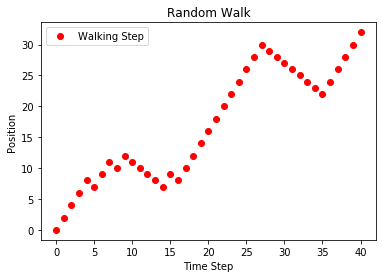

In [3]:
x = [0.]
T = 40
for t in range(T):
    p = [np.cos(2.*np.pi*float(t)/T)**2,np.sin(2.*np.pi*float(t)/T)**2]
    c = [2,-1]
    Xcstm = st.rv_discrete(name='Xcstm',values=(c,p))
    w = Xcstm.rvs()
    x.append(x[t]+w)
plt.plot(x, 'ro', label = 'Walking Step')
plt.title('Random Walk')
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.legend(loc="best")

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 1:</SPAN>** As you can see, if T is increased to a large number such as 400, the whole random walk becomes more deterministic. Calculate the expected value of the walk at each time t and overlay it onto the plot. For T large the random walk should closely follow your function.

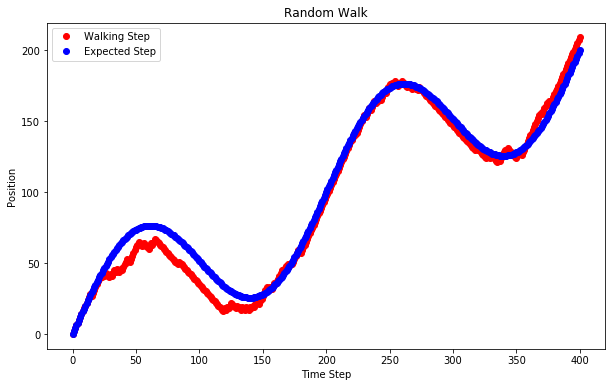

In [4]:
# Your code here
x = [0.]
e = [0.]
T = 400
for t in range(T):
    p = [np.cos(2.*np.pi*float(t)/T)**2,np.sin(2.*np.pi*float(t)/T)**2]
    c = [2,-1]
    Xcstm = st.rv_discrete(name='Xcstm',values=(c,p))
    w = Xcstm.rvs()
    w_e = Xcstm.mean()
    x.append(x[t]+w)
    e.append(e[t]+w_e)

plt.figure(figsize=(10,6))
plt.plot(x, 'ro', label = 'Walking Step')
plt.plot(e, 'bo', label = 'Expected Step')
plt.title('Random Walk')
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.legend(loc="best")

plt.show()

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 1</SPAN>**

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 2:</SPAN>** Let's create an apocalyptic scenario: Zombies have taken over the world. You and a small group of friends have managed to hide out in the new ECE building on the UIUC campus because it was built to very good anti-zombie standards. Unfortunately for you, 20 zombies have already managed to infiltrate the building and nightfall is coming. The total number of zombies that fight their way in or get pushed back each night is given by the following distribution: 

$P\{Z = 5\} = .05$

$P\{Z = 3\} = .1$

$P\{Z = 2\} = .25$

$P\{Z = 1\} = .2$

$P\{Z = 0\} = .05$

$P\{Z = -2\} = .2$

$P\{Z = -3\} = .1$

$P\{Z = -4\} = .05$

Model the total number of zombies in the building, X, as a random walk. Here $X[0] = 20$ since 20 zombies had already infiltrated the building. Instead of having a finite number of steps, run the simulation until either you push all of the zombies back, $X[T] = 0$, or the zombies overwhelm you, $X[T] = 100$. 
<ol>
    <li> Plot the total number of zombies versus time. How many nights did you survive?</li>
    <li> What's the expected number of zombies that get in each night? </li>
    <li> What's the minimum number of nights it would take you to be overwhelmed?</li>
    <li> What's the probability of that occuring? (i.e. the probability of being overwhelmed in the minimum
    possible number of nights? </li>
</ol>

Part 1


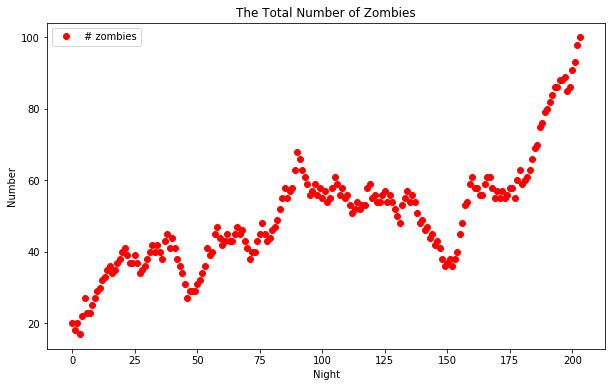

The number of nights I survived: 202

Part 2
The expected number of zombies that get in each night: 0.35


In [5]:
# Your code here

# Part 1
p = [.05, .1, .25, .2, .05, .2, .1, .05]
c = [5, 3, 2, 1, 0, -2, -3, -4]
Xzomb = st.rv_discrete(name='Xzomb',values=(c,p))

x = [20]
T = 0
while T >= 0:
    x.append(x[T]+Xzomb.rvs())
    T += 1
    if x[T] <= 0 or x[T] >= 100:
        break

print('Part 1')

plt.figure(figsize=(10,6))
plt.plot(x, 'ro', label = '# zombies')
plt.title('The Total Number of Zombies')
plt.xlabel('Night')
plt.ylabel('Number')
plt.legend(loc="best")

plt.show()

if x[T] <= 0:
    print('The number of nights I survived:', T) # push all of the zombies back, so I did not die at night T
else:
    print('The number of nights I survived:', T-1) # die at night T
    
# Part 2
ex_Nzomb = Xzomb.mean()
print('\nPart 2')
print('The expected number of zombies that get in each night:', ex_Nzomb)

__Answer:__ 

__A1:__
I survived 267 nights. Note that the number of nights I survived changes every time the simulation is run, because it is a random walk process.

__A2:__
The expected number of zombies that get in each night is 0.35.

__A3:__
The minimum number of nights it would take me to be overwhelmed is 16. To get the minimum number of nights it would take me to be overwhelmed, the number of zombies that get in the new ECE building every night should be as large as possible so that I will be overwhelmed in the shortest time. Therefore, the number of zombies that get in the new ECE building every night should be 5. As a result, the minimum number of nights it would take me to be overwhelmed can be calculated as follows. 

$N_{\text{night}} = \frac{100-20}{5} = 16$

__A4:__
The probability of being overwhelmed in the minimum posiible number of nights is $1.5258789062500013e-21$.
Given that the probability of 5 zombies getting in the new ECE building each night is $0.05$, the probability of being overwhelmed in the minimum posiible number of nights can be calculated as follows.

$P\{\text{being overwhelmed in the minimum posiible number of nights}\} = 0.05^{16} = 1.5258789062500013e-21$

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 2</SPAN>**

Now let's modify the scenario. Suppose each night you push back the horde, you get invigorated and the probability you push back the horde the next night increases. However, each night a zombie gets in, your group gets demoralized and the probability the 
horde gets in the next night increases. Below is a method I have made to model this behavior. It has three inputs: $p$ your current probability vector to be altered, $c$ your values vector, and $\delta$ the amount you want to alter the probabilities. Remember that our probabilities have to sum to one so that we need to normalize $p$. Additionally, we need to check that no probabilities are negative.

In [6]:
def ChangeProb(p,c, delta):
    for i in range(np.size(p)):
        if c[i]>0: p[i]=np.max([p[i]+delta,0]) #Changes the probabilities of the zombies coming in
        if c[i]<0: p[i]=np.max([p[i]-delta,0]) #Changes the probabilities of the zombies getting pushed back
    p = [i*1./np.sum(p) for i in p] #Normalizes the p vector so that it sums to 1
    return p

#Example of how you can use the method    
p = [0.05, 0.1, 0.25, 0.2, 0.05, 0.2, 0.1, 0.05]
c = [5,3,2,1,0,-2,-3,-4]
print ('p0:', ["%.3f" % i for i in p], 'sum:', np.sum(p)) #Returns a rounded list of the probabilities
p = ChangeProb(p,c,.02) #Example of changing probability in favor of the horde
print ('p1:', ["%.3f" % i for i in p], 'sum:', np.sum(p)) #Returns a rounded list of the probabilities
p = ChangeProb(p,c,-.05) #Example of changing the probability in favor of the survivors
print ('p2:', ["%.3f" % i for i in p], 'sum:', np.sum(p)) #Returns a rounded list of the probabilities

p0: ['0.050', '0.100', '0.250', '0.200', '0.050', '0.200', '0.100', '0.050'] sum: 1.0
p1: ['0.069', '0.118', '0.265', '0.216', '0.049', '0.176', '0.078', '0.029'] sum: 1.0
p2: ['0.020', '0.071', '0.226', '0.174', '0.052', '0.238', '0.135', '0.084'] sum: 1.0


**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 3:</SPAN>** Model the same scenario but use the method above. You will need to create a custom RV for each night. If the horde breaks through during the night, change the probabilites with $\delta=.0075$ for the next night. If you push the horde back, change the probabilites with $\delta=-.01$
<ol>
    <li> Plot the total number of zombies versus time. How many nights did you survive?</li>
    <li> The expected number of zombies coming in or leaving changes each night. Plot the expected value over time. (Note:  For any run of the experiment, the expected number of Zombies on night $t$ depends on what happened in the
    previous nights.   You should plot the expected number for each night, conditioned on what happened in previous nights.   Your answer will not be deterministic -- it will be different for different runs of the experiment.) </li>
    <li> What's the minimum number of nights it would take you to defeat the horde?</li>
    <li> What's the probability of that occuring?</li>
    <li> Typically, this simulation takes less days to complete than the previous simulation. Why might that be?</li>
</ol>

Part 1


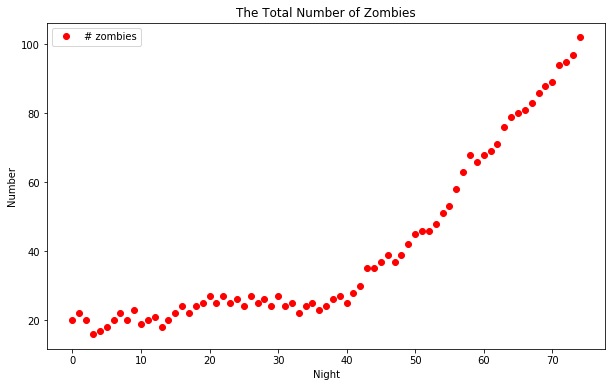

The number of nights I survived: 73

Part 2


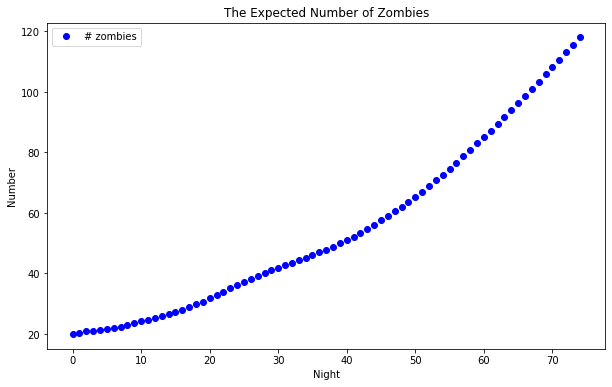


Part 4
The probability of defeating the horde in the minimum posiible number of nights: 1.6522172658400554e-06


In [8]:
# Your code here

# Part 1
# original RV
p = [.05, .1, .25, .2, .05, .2, .1, .05]
c = [5, 3, 2, 1, 0, -2, -3, -4]
Xzomb = st.rv_discrete(name='Xzomb',values=(c,p))

x = [20]
x_m = [20]
T = 0
while T >= 0:
    n_zomb = Xzomb.rvs()
    n_zomb_mean = Xzomb.mean()
    x.append(x[T]+n_zomb)
    x_m.append(x_m[T]+n_zomb_mean)
    # update RV
    if n_zomb > 0:
        p = ChangeProb(p,c, .0075)
    elif n_zomb < 0:
        p = ChangeProb(p,c, -.01)
    else:
        p = p
    
    Xzomb = st.rv_discrete(name='Xzomb',values=(c,p))
    
    T += 1
    if x[T] <= 0 or x[T] >= 100:
        break

print('Part 1')

plt.figure(figsize=(10,6))
plt.plot(x, 'ro', label = '# zombies')
plt.title('The Total Number of Zombies')
plt.xlabel('Night')
plt.ylabel('Number')
plt.legend(loc="best")

plt.show()

if x[T] <= 0:
    print('The number of nights I survived:', T) # push all of the zombies back, so I did not die at night T
else:
    print('The number of nights I survived:', T-1) # die at night T
    
# Part 2
print('\nPart 2')

plt.figure(figsize=(10,6))
plt.plot(x_m, 'bo', label = '# zombies')
plt.title('The Expected Number of Zombies')
plt.xlabel('Night')
plt.ylabel('Number')
plt.legend(loc="best")

plt.show()

# Part 4
p = [.05, .1, .25, .2, .05, .2, .1, .05]
c = [5, 3, 2, 1, 0, -2, -3, -4]

# calculate the probability of defeating the horde in the minimum posiible number of nights
p_min_i = []
for i in range(5):
    p_min_i.append(p[-1])
    p = ChangeProb(p,c, -.01)
    
p_min = np.prod(p_min_i)

print('\nPart 4')
print('The probability of defeating the horde in the minimum posiible number of nights:', p_min)

__Answer:__ 

__A1:__
I survived 53 nights. Note that the number of nights I survived changes every time the simulation is run, because it is a random walk process.

__A3:__
The minimum number of nights it would take me to defeat the horde is 5. To get the minimum number of nights it would take me to defeat the horde, the number of zombies that leave the new ECE building every night should be as large as possible so that I will defeat the horde in the shortest time. Therefore, the number of zombies that leave the new ECE building every night should be 4. As a result, the minimum number of nights it would take me to be overwhelmed can be calculated as follows. 

$N_{\text{night}} = \frac{20}{|-4|} = 5$

__A4:__
The probability of defeating the horde in the minimum posiible number of nights is $1.6522172658400554e-06$.
Given that the original probability of 4 zombies leaving the new ECE building each night is $0.05$ and that this probability will be updated with $\delta=-0.01$ if zombies leave the new ECE building in the previous night, the probability of defeating the horde in the minimum posiible number of nights can be calculated as follows.

$
P\{\text{defeating the horde in the minimum posiible number of nights}\} \\
= 0.05\times 0.06060606060606061\times 0.07131925313743495\times 0.08214065973478278\times 0.09307137346947754\\
= 1.6522172658400554e-06
$

__A5:__
The probability of zombies getting in or leaving is updated every night in this simulation, leading to a trend in this random walk process. In other words, the random walk process in __Problem 3__ is less random than that in __Problem 2__. Specifically, if zombies happen to leaving in the first few nights, a defeating trend is formed because of the increasing defeating probability. By contrast, if zombies happen to getting into the new ECE building in the first few nights, an overwhelming trend is formed because of the increasing overwhelming probability. That's to say, the way in which the probability of zombies getting into or leaving is updated cumulates the defeating or overwhelming effect to form a trend that makes the random walk process in this problem less random. With the reduced randomness, the simulation tends to proceed in a relatively fixed direction, which may decrease the time it needs to complete.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 3</SPAN>**

## Lab Questions:

Make sure to complete all lab questions 1-3 for this weeks lab.

<div class="alert alert-block alert-warning"> 
## Academic Integrity Statement ##

By submitting the lab with this statement, you declare you have written up the lab entirely by yourself, including both code and markdown cells. You also agree that you should not share your code with anyone else. Any violation of the academic integrity requirement may cause an academic integrity report to be filed that could go into your student record. See <a href="https://provost.illinois.edu/policies/policies/academic-integrity/students-quick-reference-guide-to-academic-integrity/">Students' Quick Reference Guide to Academic Integrity</a> for more information. 